In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
df = pd.read_excel('Colormap.xlsx')

In [5]:
num=2000
Entropy=np.zeros(num)
Efficiency=np.zeros(num)
for i in range(num):
    n=int(np.fix(5+95*np.random.rand()))
    temp=np.random.rand(n)**int(np.fix(1+np.random.rand()*10))
    temp=temp/sum(temp)
    Entropy[i]=np.exp(sum(-temp*np.log(temp)))/n
    Efficiency[i]=sum(temp**2)*n

[[ 1.       -0.869645]
 [-0.869645  1.      ]]


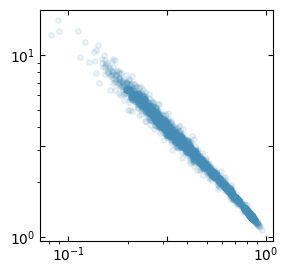

In [6]:
plt.figure(figsize=(3,3))
#plt.hist2d(1/Entropy, Efficiency, bins=100, cmap='Blues')
x=Entropy
y=Efficiency
print(np.corrcoef(x,y))
z=np.zeros(len(x))
for i in range(len(x)):
    for j in range(len(x)):
        if abs(x[i]-x[j])+abs(y[i]-y[j])<0.01:
            z[i]=z[i]+1
for i in range(len(x)):
    plt.plot(Entropy[i], Efficiency[i],'o',color='#458CB6',markersize=4,alpha=max(z[i]/max(z),0.1))
#plt.colorbar()
plt.xscale('log')
plt.yscale('log')
plt.tick_params(direction='in',top='true',right='true')
#plt.clim(0,100)
plt.xticks([10**(-1),10**(-0.5),10**0])
plt.yticks([10**0,10**0.5,10**1])
#plt.xlim(1,8)
#plt.ylim(1,10)
plt.savefig('Entropy_TransferEfficiency.pdf')
plt.show()